In [325]:
# importing Libraries...

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [326]:
# importing data...
data = pd.read_csv('QVI_data.csv')
data.head()


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [327]:
# Extracting Month and Year from Date Column...

data['DATE'] = pd.to_datetime(data['DATE'])
data.insert(1,'MONTH',data['DATE'].dt.to_period('M'))
data.head(5)

,LYLTY_CARD_NBR,MONTH,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [328]:

check = data.groupby('STORE_NBR')['MONTH'].nunique()
check = check[check != 12]
print('Stores with less than 12 month transaction data:')
display(check)
stores_with_less_than_12_months = check.index.to_list()
del check


Stores with less than 12 month transaction data:


STORE_NBR
11      2
31      2
44     11
76      1
85      1
92      1
117    11
193     3
206     2
211     2
218    11
252     2
Name: MONTH, dtype: int64

In [329]:
indices_to_drop = data[data['STORE_NBR'].isin(stores_with_less_than_12_months)].index
print(f'Shape before dropping: {data.shape}\n')
data = data.drop(indices_to_drop)
print(f'Shape after dropping: {data.shape}\n')
print(f'Number of samples that are dropped: {len(indices_to_drop)}')

Shape before dropping: (264834, 13)

Shape after dropping: (264645, 13)

Number of samples that are dropped: 189


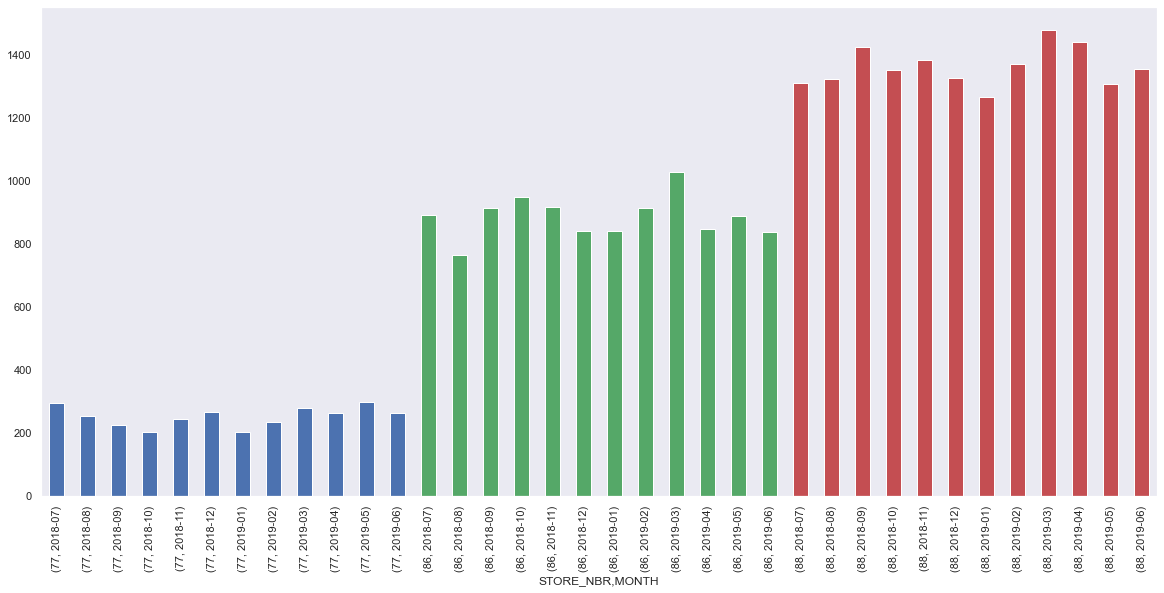

In [330]:
check = data[data['STORE_NBR'].isin([77, 86, 88])].groupby(['STORE_NBR', 'MONTH'])['TOT_SALES'].sum() # code to plot
colors = []
for store, month in check.index:
    if store == 77:
        colors.append('b')
    elif store == 86:
        colors.append('g')
    else:
        colors.append('r')

v = check.plot(kind = 'bar', color = colors, figsize = (20, 9))
plt.show()
del check, colors


In [331]:
metrics = data.groupby(['STORE_NBR','MONTH']).agg({'TOT_SALES':'sum','LYLTY_CARD_NBR':'nunique','PROD_QTY':'sum','TXN_ID':'nunique'})
metrics.head()

TOT_SALES  LYLTY_CARD_NBR  PROD_QTY  TXN_ID
STORE_NBR MONTH                                               
1         2018-07      206.9              49        62      52
          2018-08      176.1              42        54      43
          2018-09      278.8              59        75      62
          2018-10      188.1              44        58      45
          2018-11      192.6              46        57      47

In [332]:
metrics['TXN_PER_CUST'] = metrics['TXN_ID']/metrics['LYLTY_CARD_NBR']
metrics['PRICE_PER_UNIT'] = metrics['TOT_SALES']/metrics['PROD_QTY']
metrics['CHIPS_PER_CUST'] = metrics['PROD_QTY']/metrics['LYLTY_CARD_NBR']
metrics

TOT_SALES  LYLTY_CARD_NBR  PROD_QTY  TXN_ID  TXN_PER_CUST  \
STORE_NBR MONTH                                                                
1         2018-07      206.9              49        62      52      1.061224   
          2018-08      176.1              42        54      43      1.023810   
          2018-09      278.8              59        75      62      1.050847   
          2018-10      188.1              44        58      45      1.022727   
          2018-11      192.6              46        57      47      1.021739   
...                      ...             ...       ...     ...           ...   
272       2019-02      395.5              45        91      48      1.066667   
          2019-03      442.3              50       101      53      1.060000   
          2019-04      445.1              54       105      55      1.018519   
          2019-05      314.6              34        71      40      1.176471   
          2019-06      312.1              34        70      37      1.088235   

                   PRICE_PER_UNIT  CHIPS_PER_CUST  
STORE_NBR MONTH                                    
1         2018-07        3.337097        1.265306  
          2018-08        3.261111        1.285714  
          2018-09        3.717333        1.271186  
          2018-10        3.243103        1.318182  
          2018-11        3.378947        1.239130  
...                           ...             ...  
272       2019-02        4.346154        2.022222  
          2019-03        4.379208        2.020000  
          2019-04        4.239048        1.944444  
          2019-05        4.430986        2.088235  
          2019-06        4.458571        2.058824  

[3120 rows x 7 columns]

In [333]:
metrics.rename(columns = {'STORE_NBR':'Store','MONTH':'Month','TOT_SALES':'TotalSales','LYLTY_CARD_NBR':'Customer','PROD_QTY':'Quantity','TXN_PER_CUST':'TxnPerCust','PRICE_PER_UNIT':'PricePerUnit','CHIPS_PER_CUST':'ChipsPerCust'},inplace = True)
metrics
pretrial = metrics.copy()

In [334]:
#taking data before 2019-02 into consideration
trial=[]
for i in metrics.index:
    m = i[1].month
    y = i[1].year
    if (y == 2019)&(m >= 2):
        if (m <=4):
            trial.append(i)
        pretrial.drop(i,inplace = True)
trial = pd.DataFrame(trial)
trial.rename(columns = {0:'StoreNum',1:'Month'},inplace = True)
trial

,StoreNum,Month
0,1,2019-02
1,1,2019-03
2,1,2019-04
3,2,2019-02
4,2,2019-03
...,...,...
775,271,2019-03
776,271,2019-04
777,272,2019-02
778,272,2019-03


In [335]:
pretrial


TotalSales  Customer  Quantity  TXN_ID  TxnPerCust  \
STORE_NBR MONTH                                                         
1         2018-07       206.9        49        62      52    1.061224   
          2018-08       176.1        42        54      43    1.023810   
          2018-09       278.8        59        75      62    1.050847   
          2018-10       188.1        44        58      45    1.022727   
          2018-11       192.6        46        57      47    1.021739   
...                       ...       ...       ...     ...         ...   
272       2018-09       304.7        32        71      36    1.125000   
          2018-10       430.6        44        99      50    1.136364   
          2018-11       376.2        41        87      45    1.097561   
          2018-12       403.9        47        89      47    1.000000   
          2019-01       423.0        46        96      50    1.086957   

                   PricePerUnit  ChipsPerCust  
STORE_NBR MONTH                                
1         2018-07      3.337097      1.265306  
          2018-08      3.261111      1.285714  
          2018-09      3.717333      1.271186  
          2018-10      3.243103      1.318182  
          2018-11      3.378947      1.239130  
...                         ...           ...  
272       2018-09      4.291549      2.218750  
          2018-10      4.349495      2.250000  
          2018-11      4.324138      2.121951  
          2018-12      4.538202      1.893617  
          2019-01      4.406250      2.086957  

[1820 rows x 7 columns]

In [336]:
print(len(metrics),len(pretrial))

3120 1820


In [337]:
metrics.tail()

TotalSales  Customer  Quantity  TXN_ID  TxnPerCust  \
STORE_NBR MONTH                                                         
272       2019-02       395.5        45        91      48    1.066667   
          2019-03       442.3        50       101      53    1.060000   
          2019-04       445.1        54       105      55    1.018519   
          2019-05       314.6        34        71      40    1.176471   
          2019-06       312.1        34        70      37    1.088235   

                   PricePerUnit  ChipsPerCust  
STORE_NBR MONTH                                
272       2019-02      4.346154      2.022222  
          2019-03      4.379208      2.020000  
          2019-04      4.239048      1.944444  
          2019-05      4.430986      2.088235  
          2019-06      4.458571      2.058824

In [338]:
pretrial.tail()

TotalSales  Customer  Quantity  TXN_ID  TxnPerCust  \
STORE_NBR MONTH                                                         
272       2018-09       304.7        32        71      36    1.125000   
          2018-10       430.6        44        99      50    1.136364   
          2018-11       376.2        41        87      45    1.097561   
          2018-12       403.9        47        89      47    1.000000   
          2019-01       423.0        46        96      50    1.086957   

                   PricePerUnit  ChipsPerCust  
STORE_NBR MONTH                                
272       2018-09      4.291549      2.218750  
          2018-10      4.349495      2.250000  
          2018-11      4.324138      2.121951  
          2018-12      4.538202      1.893617  
          2019-01      4.406250      2.086957

In [339]:
def calcCorr(store):
    '''
    input=store number which is to be compared
    output=dataframe with corelation coefficient values
    '''
    a=[]
    metrix=pretrial[['TotalSales','Customer']]#add metrics as required e.g. ,'TXN_PER_CUST'
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    df= pd.DataFrame(a)
    df.index=metrix.index
    df=df.drop_duplicates()
    df.index=[s[0] for s in df.index]
    df.index.name="STORE_NBR"
    return df

def standardizer(df):
    '''
    input=dataframe with metrics
    output=dataframe with mean of the metrics in a new column
    '''
    df=df.abs()
    df['Magnitude']=df.mean(axis=1)
    return df

### Correlation with store 77:

In [340]:
corr77=calcCorr(77)
corr77

,TotalSales,Customer
STORE_NBR,,
1,0.075218,0.322168
2,-0.263079,-0.572051
3,0.806644,0.834207
4,-0.263300,-0.295639
5,-0.110652,0.370659
...,...,...
268,0.344757,0.369517
269,-0.315730,-0.474293
270,0.315430,-0.131259


In [341]:
corr77 = standardizer(corr77)
corr77

,TotalSales,Customer,Magnitude
STORE_NBR,,,
1,0.075218,0.322168,0.198693
2,0.263079,0.572051,0.417565
3,0.806644,0.834207,0.820426
4,0.263300,0.295639,0.279469
5,0.110652,0.370659,0.240655
...,...,...,...
268,0.344757,0.369517,0.357137
269,0.315730,0.474293,0.395011
270,0.315430,0.131259,0.223345


In [342]:
corr77 = corr77.sort_values(['Magnitude'],ascending = False)
corr77

,TotalSales,Customer,Magnitude
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426
...,...,...,...
256,0.014245,0.047863,0.031054
159,0.001655,0.054404,0.028030
260,0.016618,0.027446,0.022032


<AxesSubplot:xlabel='STORE_NBR'>

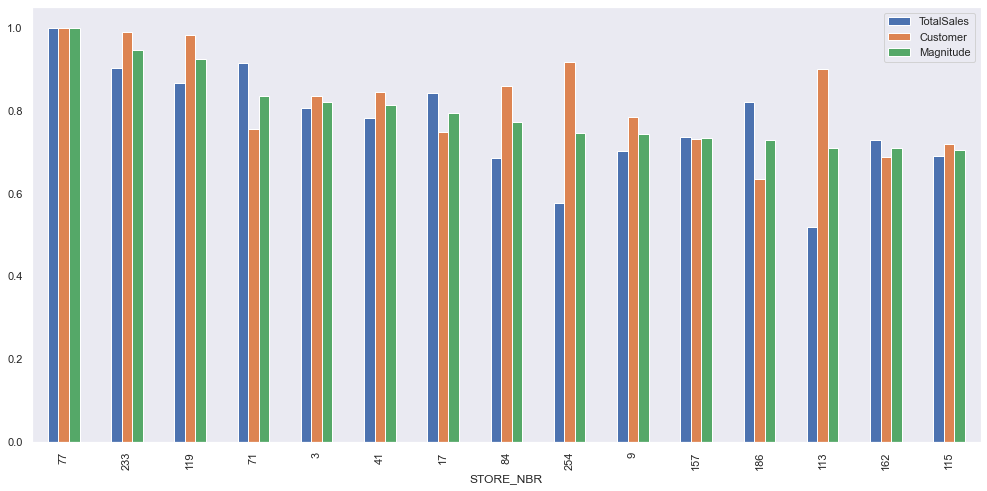

In [343]:
corr77[(corr77['Magnitude'].abs() > 0.7)].plot(kind = 'bar',figsize = (17,8))

As store 233 is more similar to store 77, We take the store 233 into consideration plotting different measure against those of store 77.

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

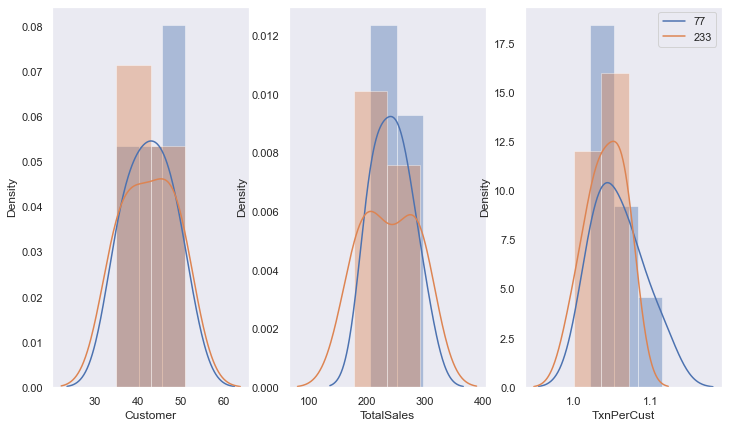

In [344]:
fig,ax = plt.subplots(1,3,figsize = (12,7))

sns.set(style = 'dark')
sns.distplot(pretrial.loc[77]['Customer'],ax = ax[0])
sns.distplot(pretrial.loc[233]['Customer'],ax =ax[0])
plt.legend(labels=['77','233'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[77]['TotalSales'],ax = ax[1])
sns.distplot(pretrial.loc[233]['TotalSales'],ax = ax[1])
plt.legend(labels = ['77','233'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[77]['TxnPerCust'],ax = ax[2])
sns.distplot(pretrial.loc[233]['TxnPerCust'],ax = ax[2])
plt.legend(labels = ['77','233'])

fig.show()

Since distributions of store 233 are similar to that of store 77, selecting store 233 as control store with max similarities to store 77. 


### Correlation with Store 86:

In [367]:
corr86 = calcCorr(86)
corr86

,TotalSales,Customer
STORE_NBR,,
1,0.445632,0.485831
2,-0.403835,-0.086161
3,-0.261284,-0.353786
4,-0.039035,-0.169608
5,0.235159,-0.253229
...,...,...
268,-0.452182,-0.034273
269,0.697055,-0.098587
270,-0.730679,-0.767267


In [374]:
corr86 = standardizer(corr86)
corr86 = corr86.sort_values(['Magnitude'],ascending = False)
corr86

,TotalSales,Customer,Magnitude
STORE_NBR,,,
86,1.000000,1.000000,1.000000
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877
...,...,...,...
91,0.019027,0.041271,0.030149
17,0.029793,0.030039,0.029916
131,0.028487,0.031142,0.029815


Stores 155, 23 and 120 are the most correlated to store86

<AxesSubplot:xlabel='STORE_NBR'>

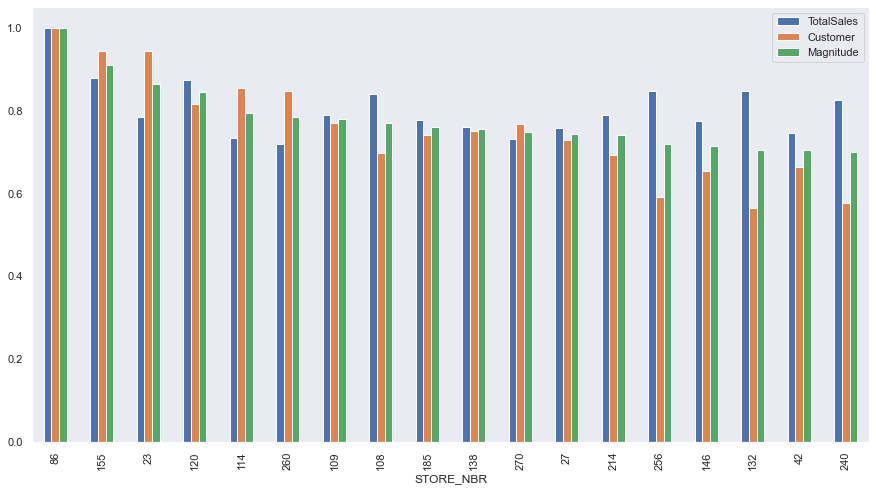

In [375]:
# selecting store 155 as control store.

corr86[(corr86.Magnitude.abs()>0.7)].plot(kind = 'bar',figsize = (15,8))

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

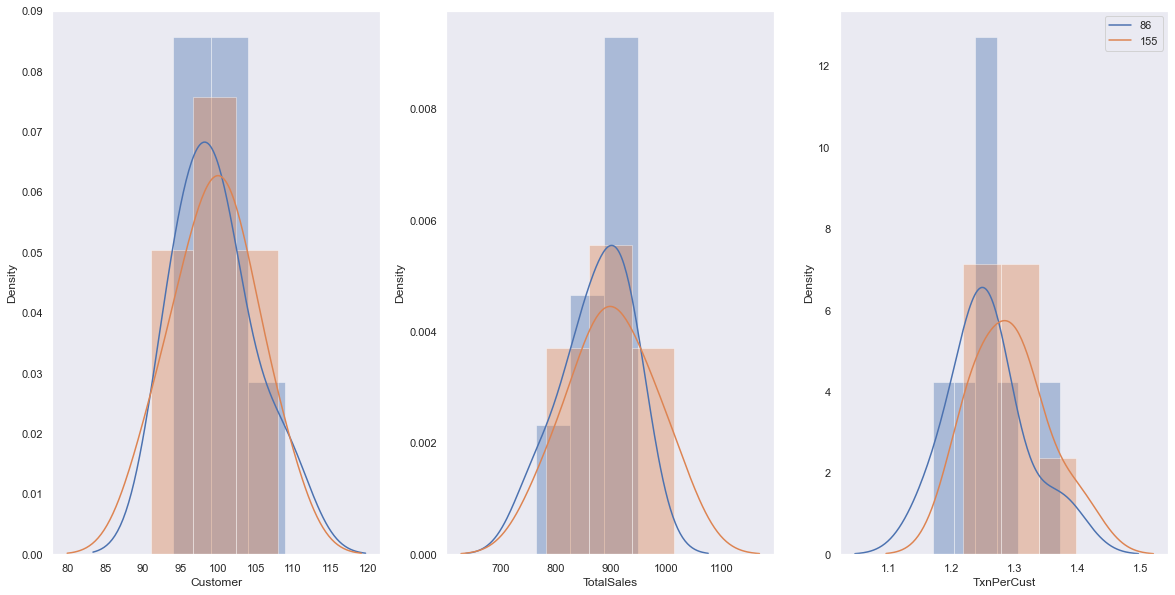

In [380]:
fig,ax = plt.subplots(1,3,figsize = (20,10))

sns.set(style = 'dark')
sns.distplot(pretrial.loc[86]['Customer'],ax = ax[0])
sns.distplot(pretrial.loc[155]['Customer'],ax =ax[0])
plt.legend(labels=['86','155'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[86]['TotalSales'],ax = ax[1])
sns.distplot(pretrial.loc[155]['TotalSales'],ax = ax[1])
plt.legend(labels = ['86','155'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[86]['TxnPerCust'],ax = ax[2])
sns.distplot(pretrial.loc[155]['TxnPerCust'],ax = ax[2])
plt.legend(labels = ['86','155'])

fig.show()

Since distributions of store 155 are similar to that of store 86, selecting store 155 as control store with max similarities to store 86


### Correlation with store 88:

In [381]:
corr88 = calcCorr(88)
corr88

,TotalSales,Customer
STORE_NBR,,
1,0.813636,0.305334
2,-0.067927,-0.452379
3,-0.507847,0.522884
4,-0.745566,-0.361503
5,0.190330,-0.025320
...,...,...
268,-0.021429,0.672672
269,-0.172578,-0.274781
270,-0.723272,-0.103032


In [384]:
corr88 = standardizer(corr88)
corr88 = corr88.sort_values(['Magnitude'],ascending = False)
corr88

,TotalSales,Customer,Magnitude
STORE_NBR,,,
88,1.000000,1.000000,1.000000
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018
...,...,...,...
271,0.103037,0.018831,0.060934
177,0.084074,0.005568,0.044821
170,0.027262,0.028583,0.027923


Stores 178,14,133 are the most correlated to store 88.

<AxesSubplot:xlabel='STORE_NBR'>

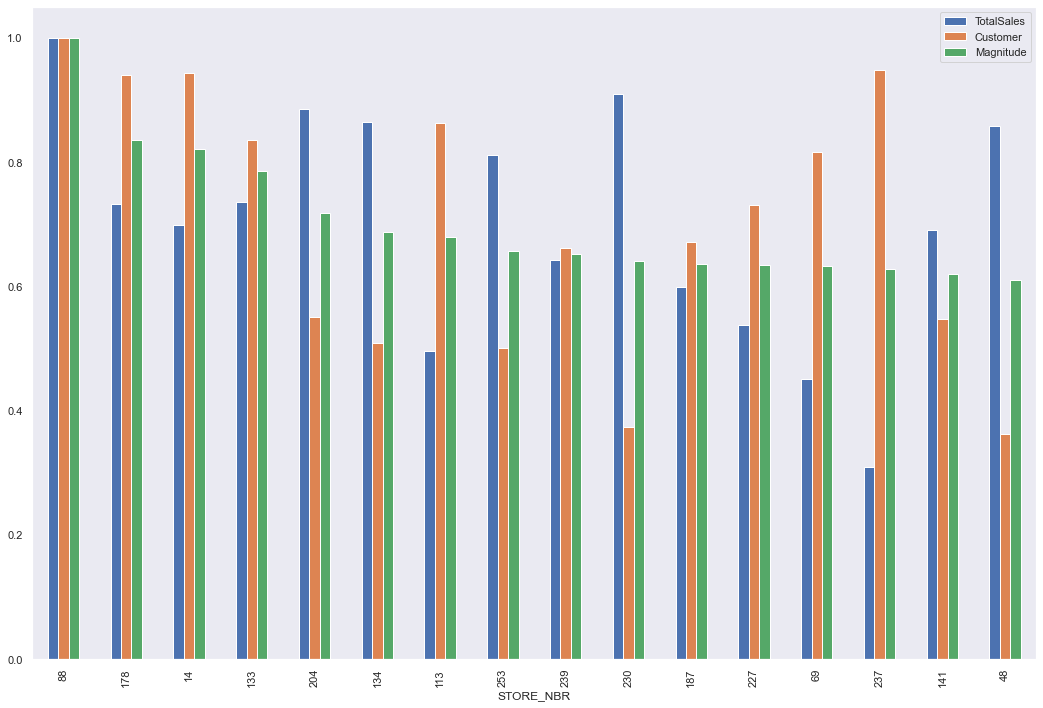

In [387]:
corr88[(corr88.Magnitude.abs()>0.6)].plot(kind = 'bar',figsize = (18,12))

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

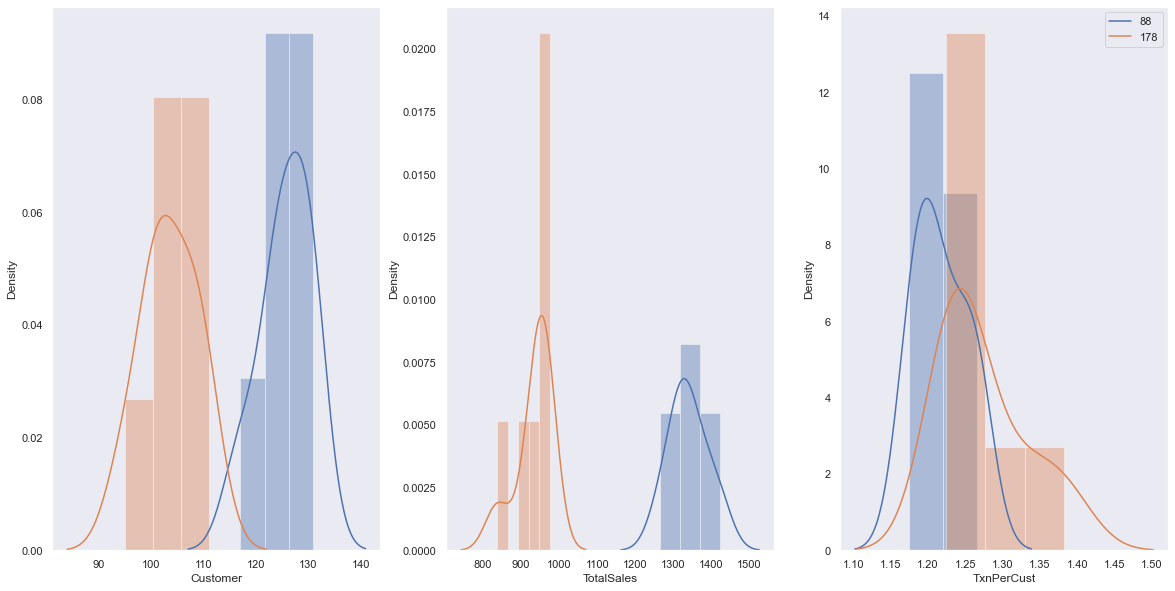

In [388]:
fig,ax = plt.subplots(1,3,figsize = (20,10))

sns.set(style = 'dark')
sns.distplot(pretrial.loc[88]['Customer'],ax = ax[0])
sns.distplot(pretrial.loc[178]['Customer'],ax =ax[0])
plt.legend(labels=['88','178'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[88]['TotalSales'],ax = ax[1])
sns.distplot(pretrial.loc[178]['TotalSales'],ax = ax[1])
plt.legend(labels = ['88','178'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[88]['TxnPerCust'],ax = ax[2])
sns.distplot(pretrial.loc[178]['TxnPerCust'],ax = ax[2])
plt.legend(labels = ['88','178'])

fig.show()

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

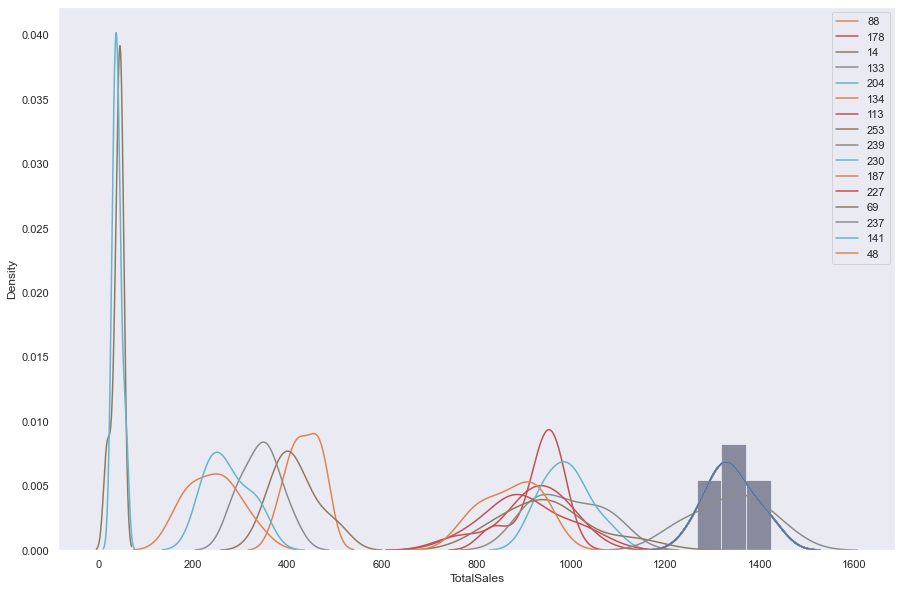

In [391]:
plt.figure(figsize=(15,10))
for x in corr88[corr88.Magnitude.abs()>0.6].index:
    sns.distplot(pretrial.loc[88]['TotalSales'])
    sns.distplot(pretrial.loc[x]['TotalSales'],label=x,hist=False)
plt.legend()

**Therefore Taking the store 237 into consideration plotting different measure against those of store 88**

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

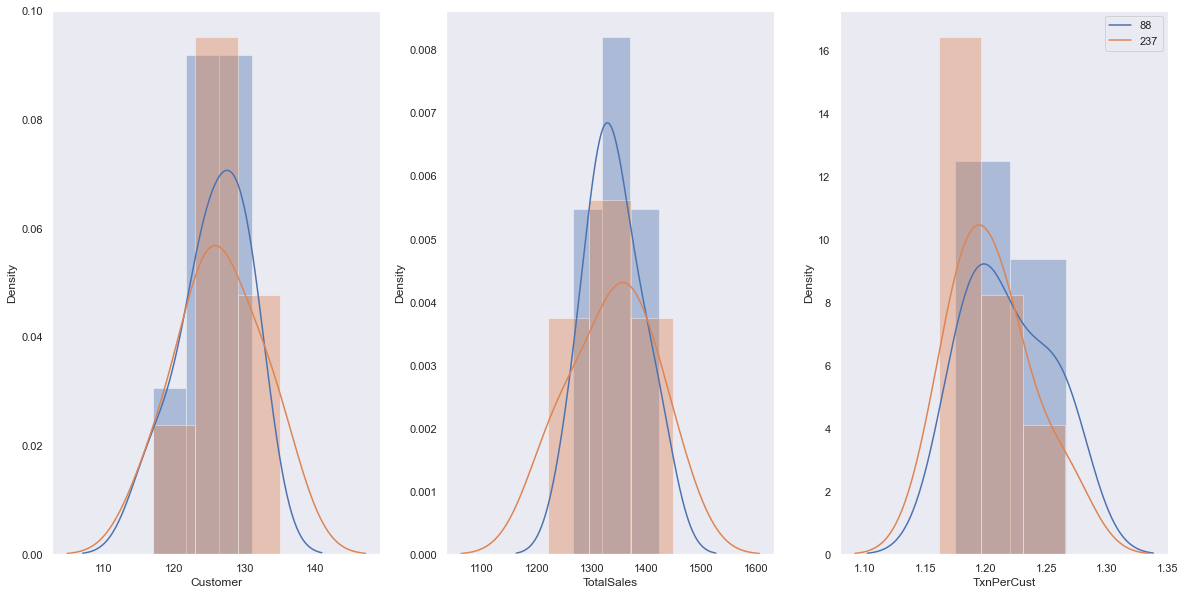

In [393]:
fig,ax = plt.subplots(1,3,figsize = (20,10))

sns.set(style = 'dark')
sns.distplot(pretrial.loc[88]['Customer'],ax = ax[0])
sns.distplot(pretrial.loc[237]['Customer'],ax =ax[0])
plt.legend(labels=['88','237'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[88]['TotalSales'],ax = ax[1])
sns.distplot(pretrial.loc[237]['TotalSales'],ax = ax[1])
plt.legend(labels = ['88','237'])

sns.set(style = 'dark')
sns.distplot(pretrial.loc[88]['TxnPerCust'],ax = ax[2])
sns.distplot(pretrial.loc[237]['TxnPerCust'],ax = ax[2])
plt.legend(labels = ['88','237'])

fig.show()

Since distributions of store 237 are similar to that of store 88, selecting store 237 as control store with max similarities to store 88


## Conclusion:

- The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of     the three trial months.
- This is not the case for trial store 86. We can check with   the client if the implementation of the trial was           different in trial store 86 but overall, the trial shows a   significant increase in sales.